<a href="https://colab.research.google.com/github/pacomm5/Plantillas/blob/main/CLUSTER_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
#!git clone https://github.com/joanby/machinelearning-az.git
! git clone https://github.com/pacomm5/machinelearning-az 

Cloning into 'machinelearning-az'...
remote: Enumerating objects: 10541, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 10541 (delta 25), reused 0 (delta 0), pack-reused 10505
Receiving objects: 100% (10541/10541), 311.58 MiB | 21.60 MiB/s, done.
Resolving deltas: 100% (245/245), done.
Checking out files: 100% (10250/10250), done.


# Damos acceso a nuestro Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [3]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [4]:
!pip install sklearn

# K-Means

# Cómo importar las librerías


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [6]:
dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 4 - Clustering/Section 24 - K-Means Clustering/Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values # nos quedamos con todas las filas y con las columnas ingresos y gastos en el centro comercial.

In [7]:
dataset.head() # el score esta calculado por cuanto se gasta en el centro comercial. mayor numero mas gastan. los vamos a segmentar por ingresos y gastos en el centro comercial.

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Método del codo para averiguar el número óptimo de clusters

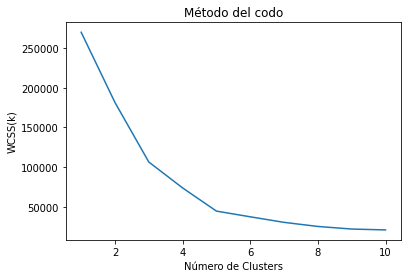

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11): # decidimos los 10 primeros segmentos. 
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0) # n_cluster ponemos i, cuando i valga 1 se crea 1, cuando valga 2 secrean 2...
    # init utilizamos k-means++ para no caer en la trampa, max itter es el maximo de iteracciones, por defecto viene 300, y la inicializacion aleatoria es 10.
    kmeans.fit(X) # aqui ajustamos X
    wcss.append(kmeans.inertia_) # aqui calculamos la suma de los cuadrados y se le añdimos a la lista. 

plt.plot(range(1,11), wcss) # en el eje de las x del 1 al 11 y en el eje de las y la suma de los cuadrados. 
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

# Aplicar el método de k-means para segmentar el data set

In [9]:
kmeans = KMeans(n_clusters = 5, init="k-means++", max_iter = 300, n_init = 10, random_state = 0) # ya le metemos 5 como número de clusters.
y_kmeans = kmeans.fit_predict(X) # aqui ajustamos X

In [10]:
y_kmeans # el primero pertenece al 4 el segundo al 3 etc.....

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

# Visualización de los clusters

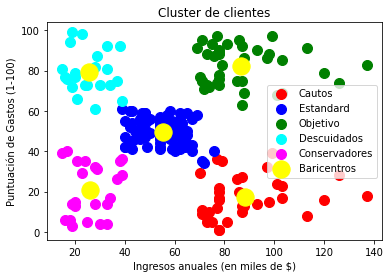

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = "red", label = "Cautos") # cluster 0 ejes de las x e y, s es el tamaño de la bola c es es el color laber lo que le ponemos. 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = "blue", label = "Estandard")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = "green", label = "Objetivo")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = "cyan", label = "Descuidados")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = "magenta", label = "Conservadores")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = "yellow", label = "Baricentros") # aqui pintamos el baricentro. 
plt.title("Cluster de clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de Gastos (1-100)")
plt.legend()
plt.show()